In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np





In [ ]:
df = pd.read_csv("/content/breast_cancer.csv")


In [ ]:
df = df.drop("id",axis=1)
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.939


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=x.columns,impurity=False, filled=True)

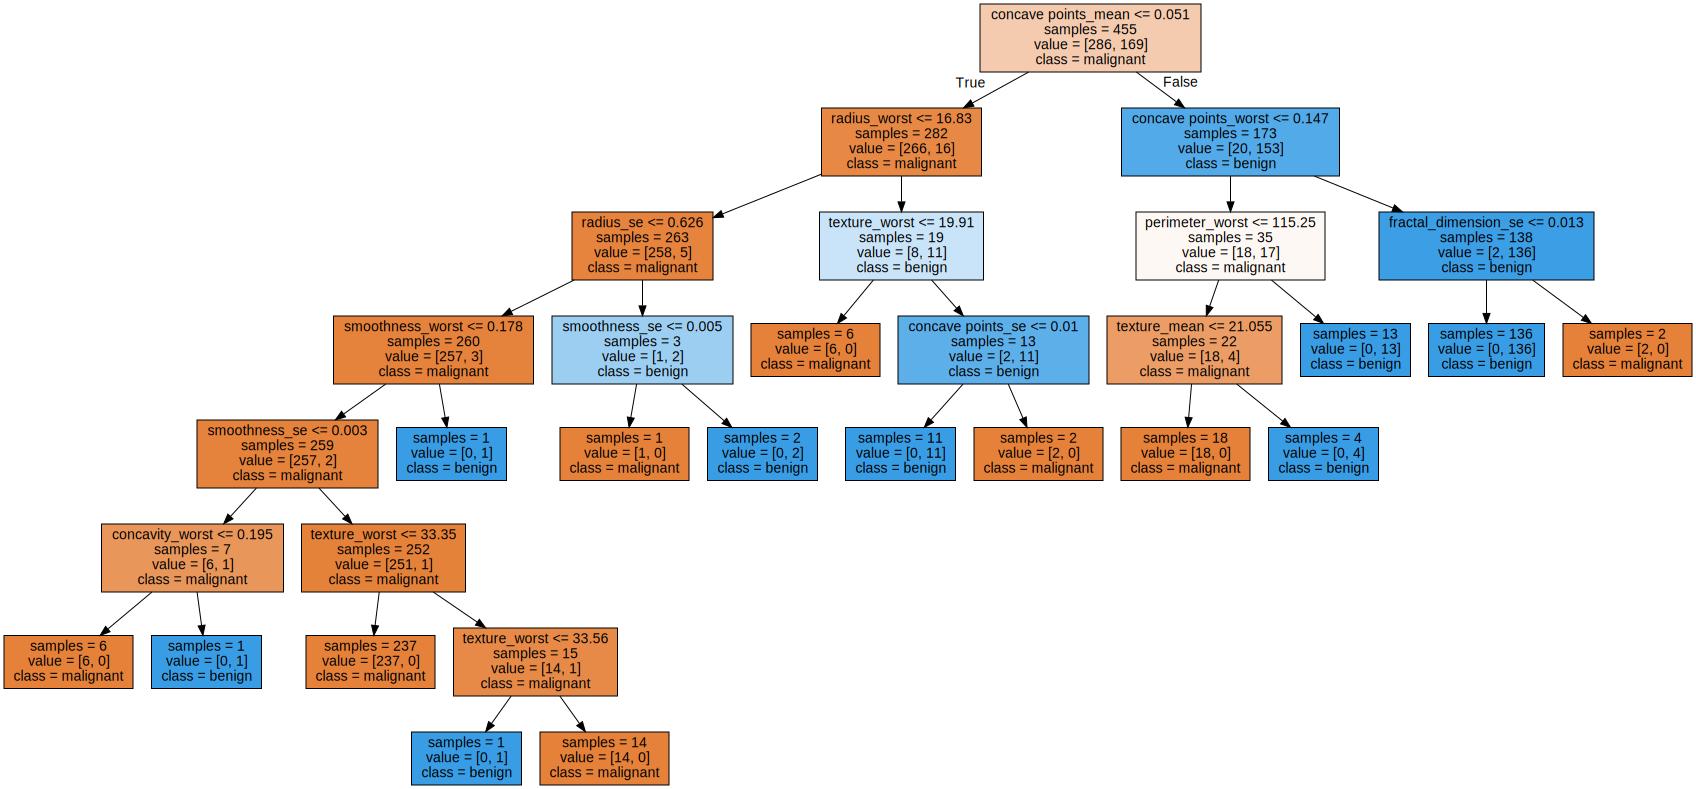

In [ ]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.03080835 0.         0.         0.         0.
 0.         0.69141955 0.         0.         0.01198257 0.
 0.         0.         0.00751256 0.         0.         0.01593081
 0.         0.01855447 0.05229927 0.03704562 0.05149396 0.
 0.00923319 0.         0.00806885 0.06565079 0.         0.        ]


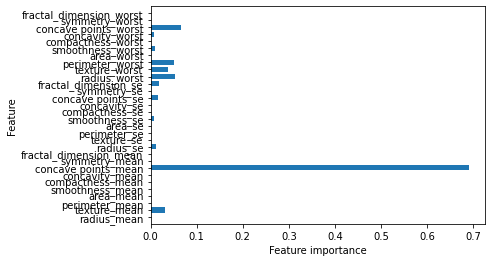

In [ ]:
def plot_feature_importances_cancer(model):
 n_features = x.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), x.columns)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
 x,y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972
